
# Predicting Bank Term Deposit Success with Machine Learning



Daniel Xu

DANL 320: Big Data Analytics

Dr. Byeong-Hak Choe

May 13, 2025


# Introduction



  In the competitive landscape of the financial sector, banks constantly seek new methods to gather potential new clients and generate stable streams of revenue for profit. Among various banking products, term deposits serve as a cornerstone of income for financial institutions. Term deposits, also known as a fixed deposit or time deposit, is a financial product where you agree to deposit a specific amount of money for a set period and earn a fixed interest rate. These fixed-term investments offer customers a secure way to earn interest over a predetermined period which ensures higher interest rates than traditional liquid savings accounts. For banks, this is essential as it allows banks to invest the money in other financial products that pay a higher rate of return (RoR) than what the bank is paying the customer for the use of their funds whilst maintaining liquidity and stabilizing funding within their company. Additionally, clients who do opt in for a term deposit can not withdraw the money or face a penalty depending on which banking institution or term deposit.


  To promote term deposits effectively, many banks employ a wide array of marketing strategies, including digital advertisements, email marketing, social media outreach, and phone calls to potential clients. With the evolution of technology, telephone-based marketing remains one of the most effective ways to get new clients especially for banks. It allows the representative of the bank to have a direct and personal conversation with the clients and allows for real-time customer engagement, clarifications, and persuasion. However, this comes with a cost particularly in regards with the amount of time and calls the representative has to do for one potential client resulting in cost-inefficiency. By using data-driven insights on potential clients who are more likely to subscribe to a term deposit will allow the banks to improve efficiency, reduce costs, and maximize returns on marketing investments.


  This project will use a dataset from Kaggle where all the data is derived from the direct marketing efforts of a Portuguese banking institution that primarily focused on telephone-based marketing. The dataset includes over 45,000 client records, each with detailed demographic, socio-economic, and campaign-related information which will be used to determine the potential clients to reach out to for banks. In this dataset, the target variable is ‘y’ for term deposits which have binary outcomes of  “yes” or “no”. The key variables selected for analysis in this study will include age (age of the client), job type (the client’s occupation), marital status, education level, and default status (whether the client has credit in default). In addition, financial obligations such as having a housing loan or personal loan and campaign-specific variables include the duration of the last contact (in seconds) and the number of contacts performed during the campaign will be included into the regression. For this project, the two main objectives are to find out which factors are the most important in determining whether a client will subscribe to a term deposit (y) which will allow banks to prioritize clients who have those specific variables. The second main objective will be to determine what actions banks can take to increase the likelihood of clients subscribing to term deposits based on the key findings. By identifying which characteristics are most closely associated with the positive outcomes, banks will be more informed, have data-driven marketing strategies that improve targeting, reduced operational costs, and ultimately boost customer conversion rates.


# Data



  The data used in this project originates from Kaggle, where it is based on the direct telemarketing campaigns conducted by a Portuguese banking institution. The data is publicly available and originally sourced from the UCI Machine Learning Repository, as part of a research effort detailed in the studies by Moro, Cortez, and Rita (2014). The data was “collected from 2008 to 2013” (Moro) and contains 45,211 observations in the training set and 4,521 in the test set, representing client-level data. The dataset is structured into 18 columns, which include both categorical and numerical variables where ‘y’ or term deposit is the target variable. As previously mentioned, for this project the key variables selected for analysis includes age, job type, marital status, education level, default status, housing loan, personal loan, duration of the last contact, and number of contacts made during the campaign. The demographic variables which describe the personal and social characteristics of the client are age, job type, marital status, and education. The financial variables that relate to the client’s financial situation are default status, housing loan, and personal loan. Additionally, the numeric variables used in this analysis include age, duration of the last contact, and the number of contacts made during the campaign while, the categorical variables include job type, marital status, education level, default status, housing loan, and personal loan.

  
  After loading the dataset into Google Colab, I had to make some changes to clean the data before running any models. Some values in the categorical variables, like basic.4y in the education column, contained periods which caused errors during the regression process. To fix that issue I changed all the periods in underscores which the machine learning models can recognize as a space and won’t interfere with the regressions.


Figure 1. Value renaming for variables in the dataframe

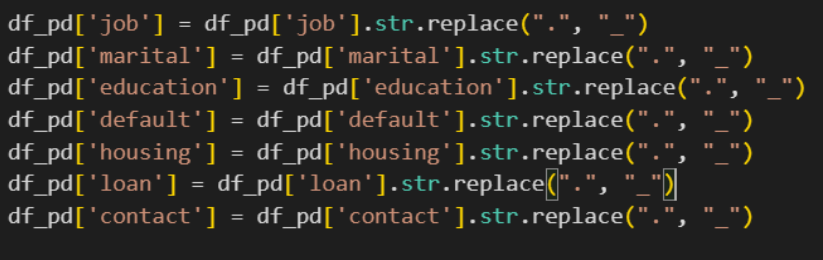

  As seen in Figure 1, the same code was applied to job, marital status, default, housing, loan, and contact since the column variables all contained values with periods. Additionally, the variable ‘y’ or term deposit had categorical values of ‘yes’ or ‘no’ which needed to be changed to 1 for ‘yes’ and 0 for ‘no’ allowing the regressions to run smoothly. For the project, I removed the ‘unknown’ from ‘loan’ as it caused perfect multicollinearity and caused errors in the machine learning models. Finally, I created dummy variables for all the categorical columns such as job, marital status, education, default status, housing loan, and personal loan as seen in Figure 2 for the machine learning models.


Figure 2. Creation of dummy variables


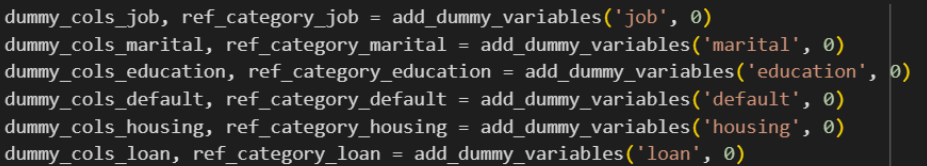

  In Figure 3, a summary of the key numerical variables like age, duration, and campaign which helps provide insight into the client base and the nature of the bank’s marketing outreach. The average client age was about 40 years old, suggesting that most individuals targeted in the campaign are middle-aged. The duration variable, which represents the length of the last phone call, has an average of around 258 seconds, meaning most calls lasted just a few minutes. The campaign variable, showing how many times a client was contacted, averages about 2.5 calls per person. Figure 4 shows a histogram of the variable duration, which represents the length of the last phone call in seconds. The chart reveals that around 25,000 clients ended their calls within the first 2.5 minutes. This suggests that a large portion of the clients may not have been interested in the offer, as many seemed to end the call quickly. With this in mind, it appears that maintaining client attention is a challenge in these marketing campaigns. Overall, the histogram provides useful insight into client behavior and highlights the importance of making a strong impression early in the call.


Figure 3. Descriptive statistics of age, duration, and campaign

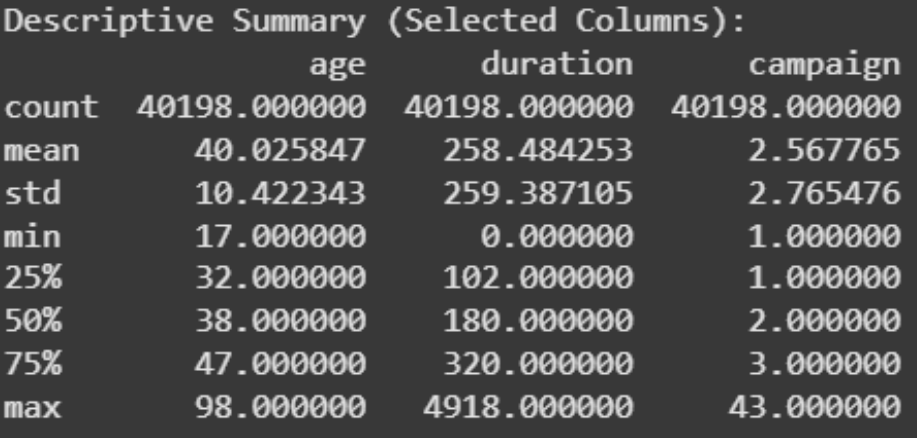

Figure 4. Histogram of Duration

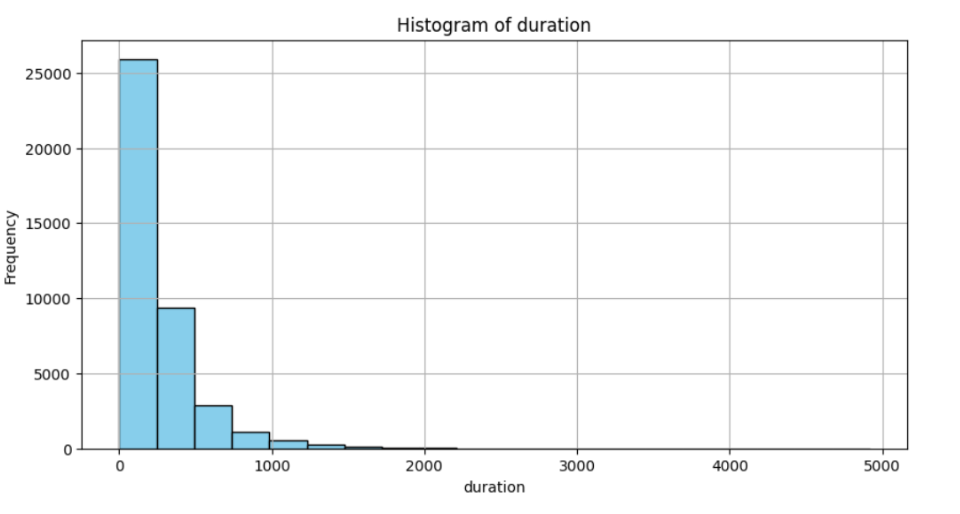

  Lastly, the final bar plot shows the distribution of the target variable (y or term deposit), with the response as '0' for "no" and '1' for "yes." Additionally looking at the bar plot, the majority of the clients around 35,000 did not subscribe to a term deposit, while only about 5,000 subscribed. This indicates that there is a significant class imbalance in the data, with the "no" outcomes greatly out numbering the "yes" responses. This can lead to issues with model performance because many machine learning models will favor the majority class when making predictions.

Figure 5.Bar Plot of y

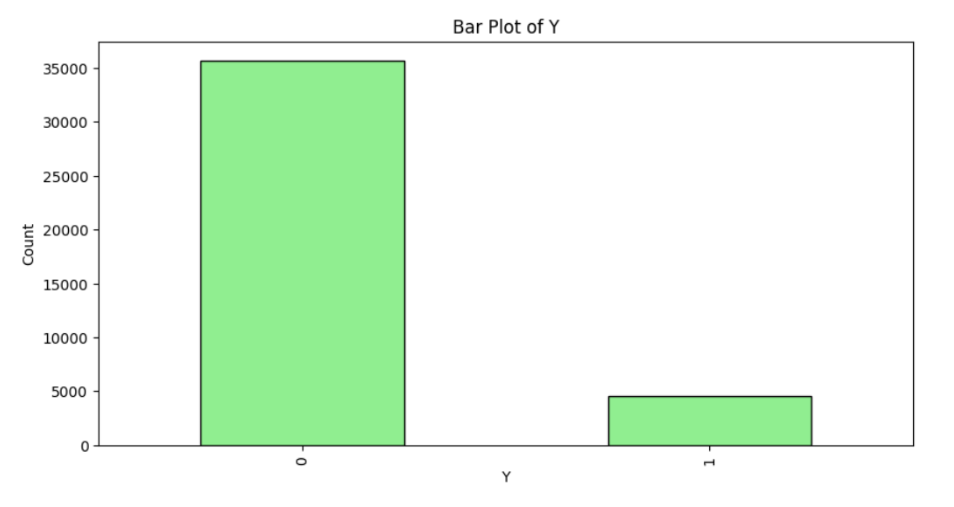


  In Figure 6, I created a heat correlation map using the numerical variables in the dataset. This visual tool helps identify multicollinearity, which occurs when two or more variables are highly correlated (typically above 0.8 or below –0.8). Multicollinearity can be problematic because it can distort the results of regression models by inflating the variance of coefficient estimates. One of the most notable observations from the heatmap is the strong positive correlation between the variable duration and the target variable y (term deposit), with a correlation value of approximately 0.8 as shown in Figure 6. This suggests that the longer a phone call lasts, the more likely it is that the client will agree to subscribe to a term deposit. This makes sense intuitively, as longer calls may indicate higher engagement or interest from the client. By highlighting these relationships, the heatmap provides useful insights that can inform which variables to prioritize or monitor closely when fitting regression models.


Figure 6. Heat Correlation Map of variables and y

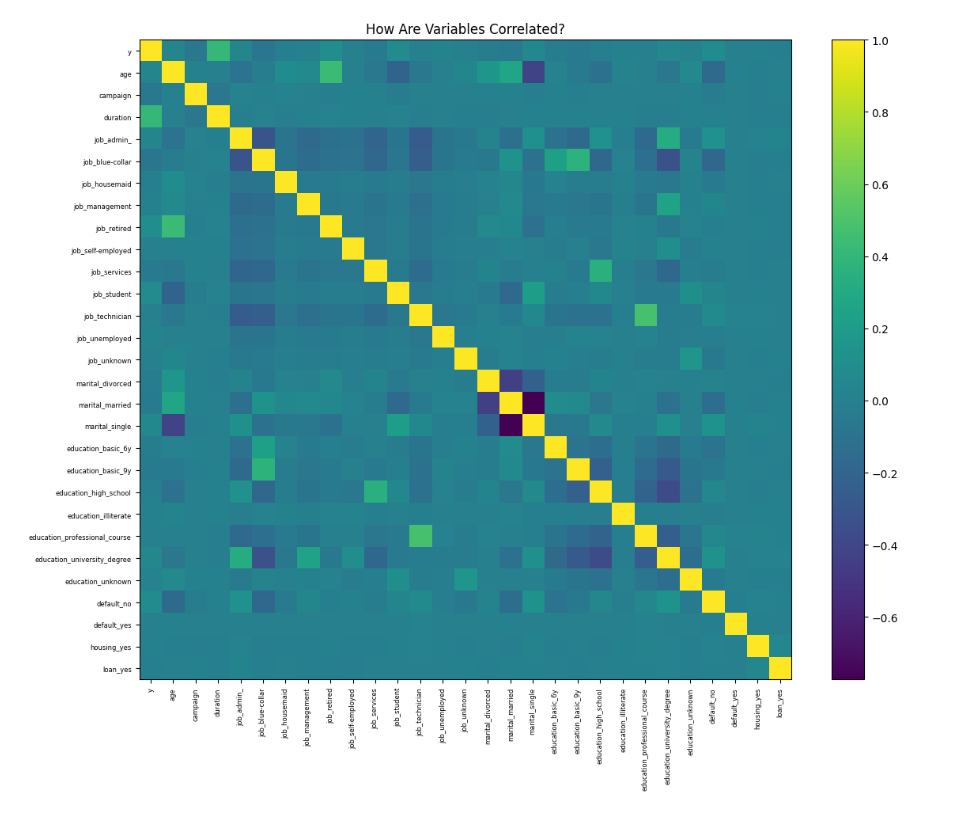

# Machine Learning Model



  For this project, I employed several machine learning models, including linear regression, logistic regression, dual density plot, pruned decision tree, random forest, and gradient boosting. Since the target variable, ‘y’, is binary, where 1 represents a client subscribing to a term deposit and 0 means they did not, the primary task is classification. Logistic regression is particularly well-suited for this analysis because it models the probability of a binary outcome and enables straightforward interpretation of the influence of individual variables. Linear regression was also included as a baseline model, although it is not ideal for binary outcomes, it helps highlight the improvements gained through classification techniques. Additionally, tools such as the confusion matrix and dual density plots were used to evaluate model performance and visualize the separation between classes. The decision tree-based models, like random forest and gradient boosting, were used to improve predictive accuracy and assess variable importance.


  The linear regression model, as shown in Figure 7, includes 28,137 observations and produces an R² value of 0.197. This means that approximately 19.7% of the variance in the target variable (y)—whether a client subscribes to a term deposit—is explained by the model. The Root Mean Square Error (RMSE) is 0.283, indicating a moderate level of prediction error. One key insight is that duration has a strong positive relationship with y, supporting earlier observations that longer phone calls are associated with a higher chance of success. Certain job types, such as student (coefficient of 0.142) and retired (0.107), are positively associated with subscription, suggesting these groups are more responsive to the campaign. On the other hand, jobs like blue-collar and entrepreneur have negative coefficients, indicating a lower likelihood of agreeing to a term deposit offer.


Figure 7. Linear regression

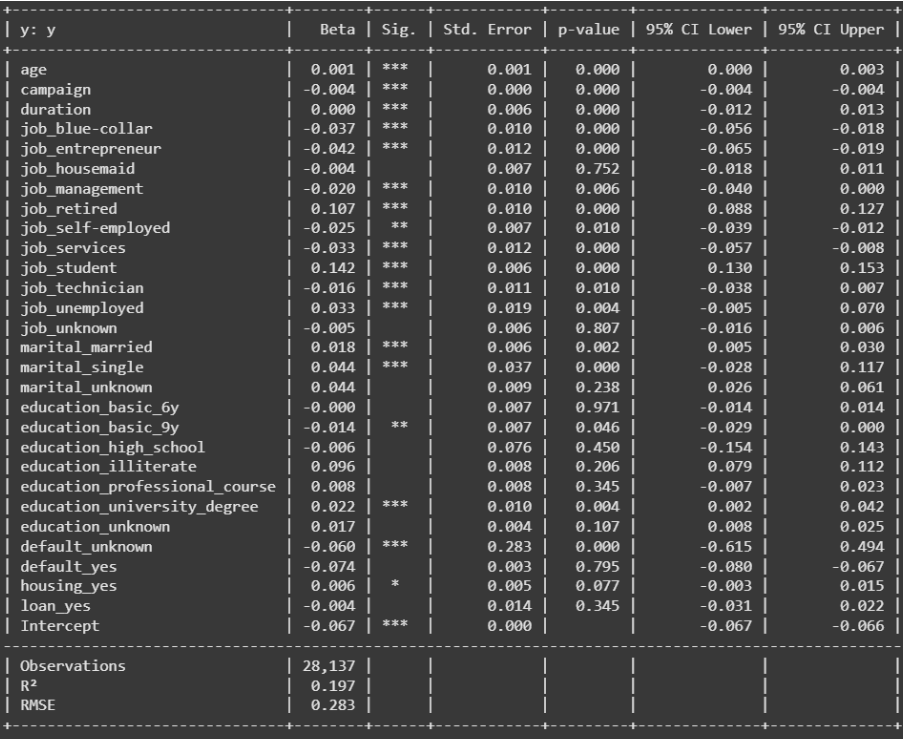

  The logistic regression model in Figure 8 reveals several important insights about the likelihood of a client subscribing to a term deposit. The residual deviance of 15,256.47 and an AIC of 15,314.47 indicate a decent model fit compared to the null deviance of 19,753.24. The variable duration has the most substantial positive effect on the outcome with a coefficient 0.0040, confirming that longer calls significantly increase the odds of a ‘yes’. Similarly, client age has a modest positive effect where β = 0.0151, while the number of contacts during the campaign is negatively associated with success where β = -0.1296, suggesting that repeated calls may lower effectiveness. In terms of job roles, students had a β of 1.0812 and retired individuals had a β of 0.8392 are much more likely to say ‘yes’ while blue-collar had a β of -0.5617 and entrepreneur had a β of -0.5592 where the roles show negative associations with success. The education level university degree also has a significant positive effect β of 0.2100, while basic 9-year education is negatively associated with subscription.  Overall, the logistic regression model offers stronger interpretability than linear regression for this binary classification task and confirms that call duration and client profile significantly affect campaign outcomes.


Figure 8. Logistic Regression

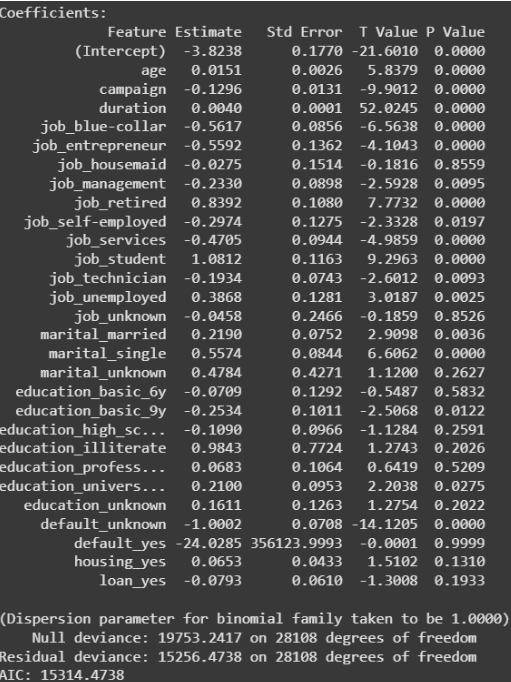

  In addition, a dual density plot (Figure 9) was employed to show the logistic regression model's predicted probabilities for the positive and negative classes. The cut-off of 0.11 selected here is significantly less than the traditional 0.5 cut-off, so the model becomes more liberal in marking an observation as a positive case. This reduced threshold has the purpose of enhancing recall by capturing more true positives, something that is especially useful in situations where failure to capture a positive case comes at a high cost. The greater recall is achieved at the expense of precision, however, as it captures more false positives. The narrative readily illustrates the overlap of distribution at this loose threshold, emphasizing the trade-off between recall and precision and highlighting the need to set the threshold to the exact objectives.

Figure 9. Dual Density Plot

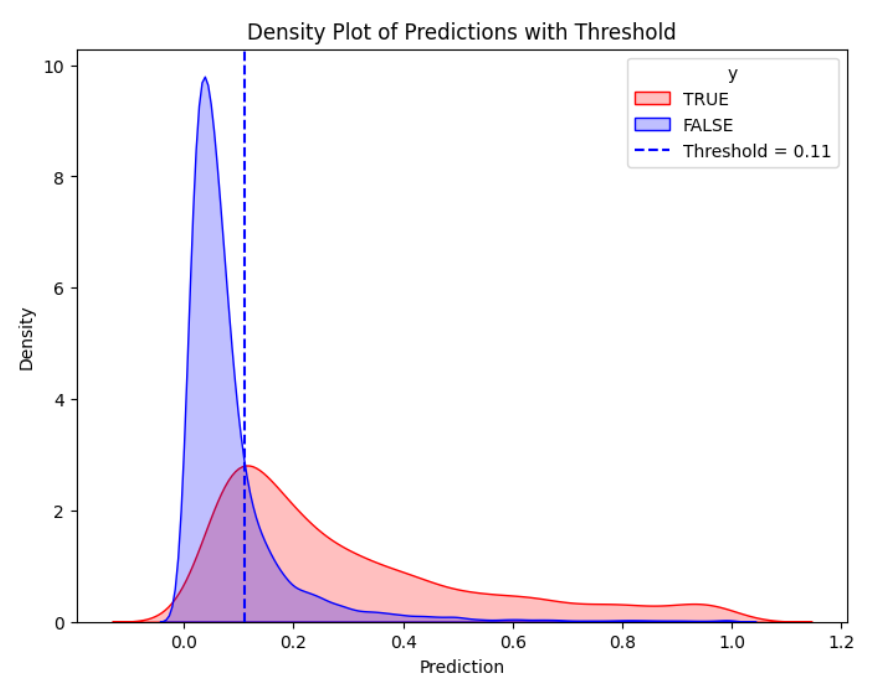

  The pruned regression tree as seen in Figure 10 for predicting y demonstrates a model with a training mean squared error (MSE) of 0.078 and a test MSE of 0.079, indicating strong generalization and minimal overfitting. The tree uses key features such as duration, age, and default status to split the data, with duration being the most influential predictor at the root node. We see lower values of duration and age tend to correspond to lower predicted probabilities, while longer durations and certain profiles, like non-students with unknown default status, can lead to higher predictions of the target variable. Leaf nodes with higher predicted values often have increased squared error and fewer samples, reflecting more uncertain predictions. Overall, the pruned tree balances complexity and interpretability, giving us valuable insight while maintaining predictive accuracy.


Figure 10. Prunned Tree


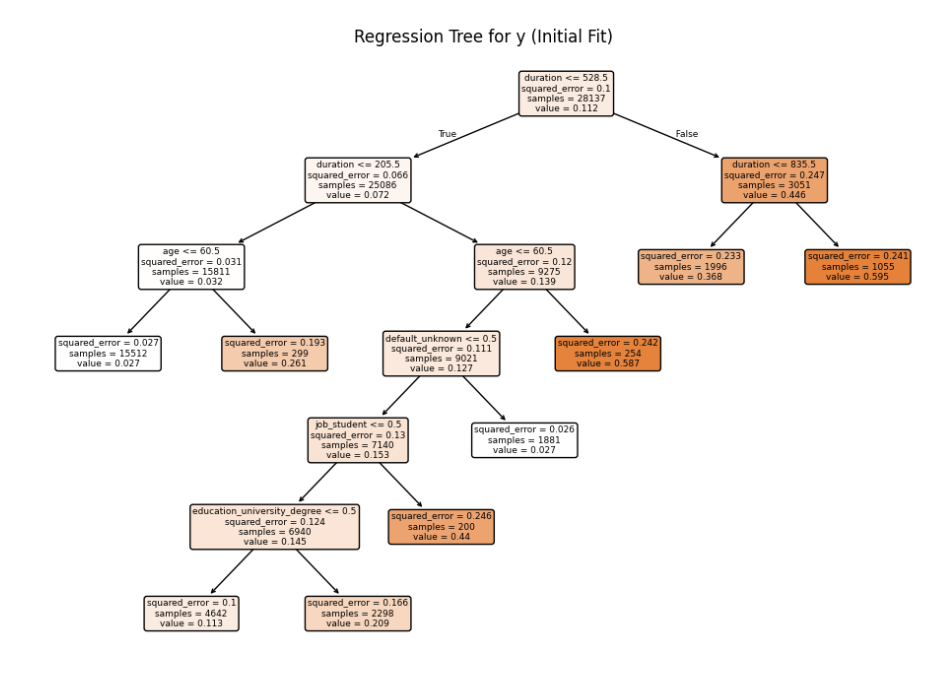

  The random forest model as shown in Figure 11 was built using 500 trees and allowed up to 5 features per split where it performed very well on the training data, with a low mean squared error (MSE) of 0.0112. However, the model's performance was weaker as it was defined by the out-of-bag (OOB) score which was around  0.179 and the test MSE was higher at 0.0825, suggesting that the model may not generalize well beyond the training set. This can also be seen in the observed vs. predicted graph, where the predicted values are mostly clustered near 0 and 1 where it is matching the binary nature of the target and many do not line up closely with the actual values. Ideally, points would fall along the red dashed diagonal line (indicating perfect predictions), but the noticeable vertical spread shows that the model frequently misses the true probability. This may be due to imbalanced data or limitations in the features used, and it suggests that the model captures general patterns but lacks accuracy in estimating probabilities more precisely.


Figure 11. Random Forest graph

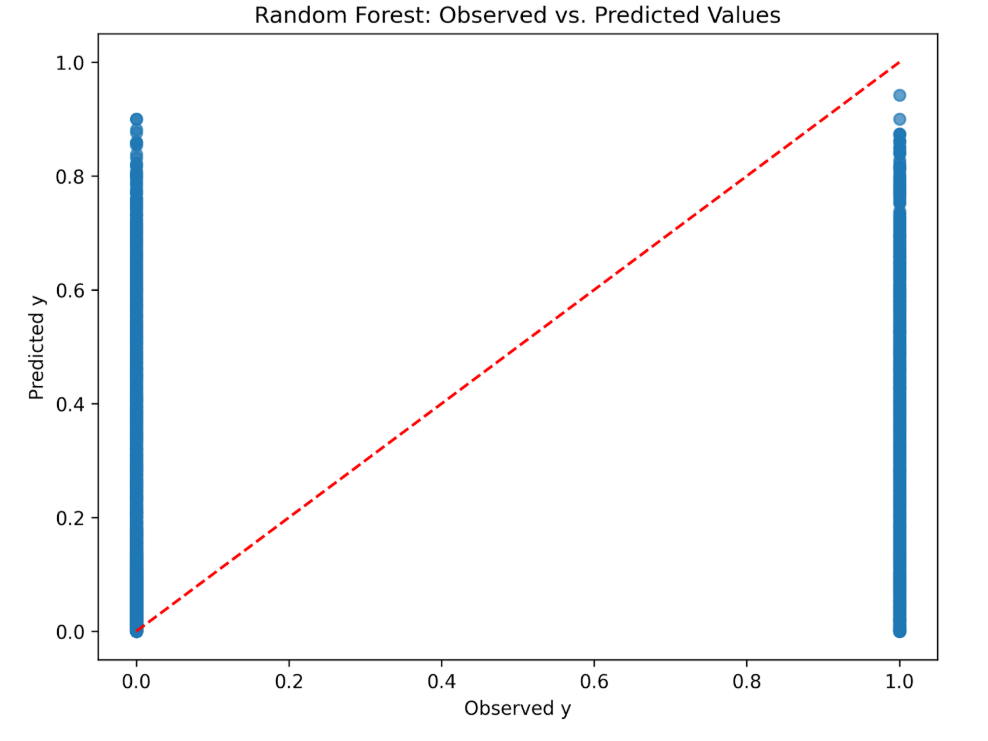

  The importance of the variables as seen in Figure 12 from the random forest regression model show the importance of various features in deciding whether a customer will subscribe to a term deposit. The highest ranked feature is duration (0.4865), where it was the strongest feature, showing that the duration of the last phone call is most significant in deciding probability of subscription. Age (0.2286) also  has high importance, where it states older clients would most likely subscribe. Campaign (0.0716) is of medium importance, and this is the interactions with the client during the course of the campaign as a cause factor. On the other hand, job type attributes have very low in significance, with some examples like job_services (0.0059) and job_technician (0.0091) contributing to a low amount to the model predictions, suggesting that job type is not a significant influence in whether or not a client will take out a term deposit. Similarly, marital status and education level also carry a moderate importance with characteristics like marital_single (0.0143) and education_high_school (0.0113), where there is some effect, although not anywhere close to that of the age and tenure cases. The characteristics loan (0.0200) and housing (0.0289) show that taking a personal loan or a housing loan also has a limited effect on subscription likelihood. In general, this analysis identifies the variables that exert the greatest control over client probability to subscribe to a term deposit that can be utilized to prevent wasteful and inefficient marketing tactics.)

Figure 11. Variable Importance


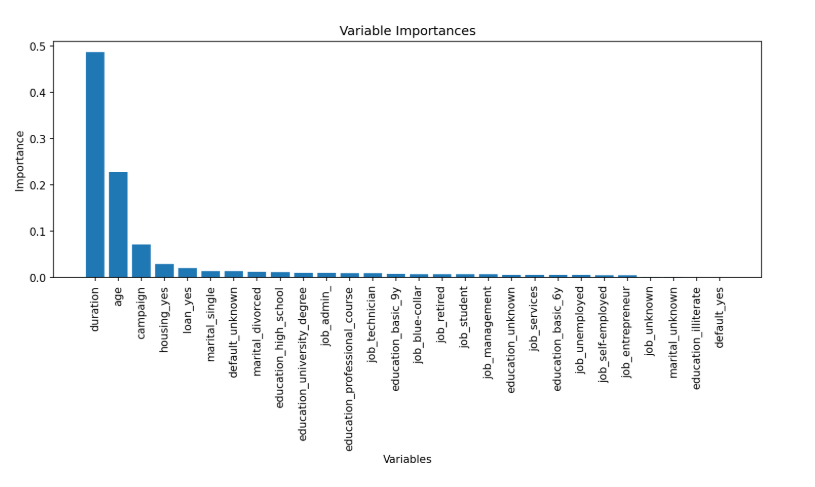

  The Gradient Boosting model in Figure 13 shows a Test MSE of 0.08096, indicating a moderate error, suggesting the model performs reasonably well in predicting term deposit subscriptions. The variable importance analysis reveals that duration holds the highest importance, as it is frequently used in splits across all trees, underlining its critical role in predicting whether a client will subscribe to a term deposit. Age follows as the second most important feature, reinforcing its significance as a key indicator in the prediction process. These insights highlight that both duration and age are essential features in the model, with duration being particularly influential.

Figure 13. Gradient Boosting

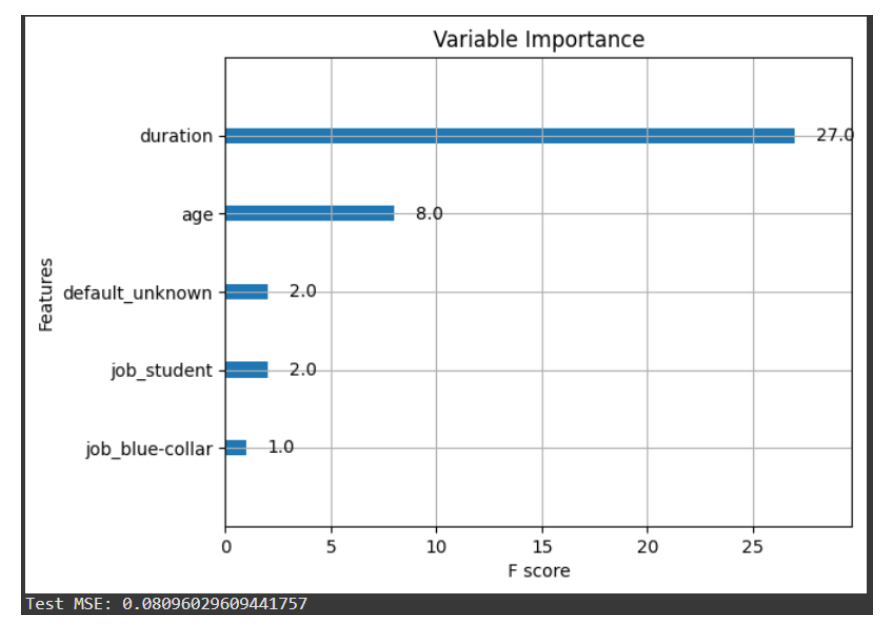

# Policy Applications



  In this project, several variables were determined to directly influence the likelihood of a client enrolling in a term deposit. Call duration was among the most significant factors determined, and it revealed that longer and more meaningful calls with clients significantly increase the likelihood of securing a term deposit. This means that meaningful client engagement in calls significantly increases the likelihood of a successful client for a term deposit. Age was the other important factor in which older clients, especially those who were 50 years and above, would most likely purchase a term deposit so that the bank should focus on clients who would know the safety of the fixed interest rate. On the other hand, factors like job class and education level were the least predictive in more than one model, such as random forest and gradient boosting. This implies that the client's profession or educational status does not have a great impact on whether they will subscribe to a term deposit. Therefore, depending on these characteristics to inform marketing segmentation may result in wastage of resources and possibly miss more profitable prospects. There are a couple of other variables in the middle importance range and, while less predictive on their own, could still provide useful information if combined with more powerful predictors. Some variables include marital status, housing loan, and personal loan, each of which may not do much to change the model's prediction by itself but that can improve performance when used with more predictive features such as call duration and age.


  Based on these findings, banks can adopt a variety of measures to increase their term deposit subscription rates. Bank employees should be trained to focus on quality rather than quantity in client interactions, prioritizing explanation, listening, and trust-building throughout the call. Since longer calls have been associated with increased success, this shift in approach may have a dramatic effect on conversions. Second, marketing must be more directed towards older clients, emphasizing concerns such as retirement security and low-risk investing. Older clients tend to value steady returns and may find more attractive financial products that are oriented towards delivering on security instead of risky investments. Additionally, restricting the number of client contacts could also be desirable where a high-quality initial contact would be more effective than excessive follow-ups. Overloading with communication could result in client fatigue or frustration, which ultimately reduces the prospect of a positive response. Instead, banks should focus on making a persuasive initial impression by providing clear information about the worth of the term deposit, solving likely issues, and offering customized information. Finally, banks should refrain from segmenting marketing campaigns purely on the basis of occupation or education level because econometric models consistently find that these variables have relatively little impact on term deposit subscription forecasting. Instead, banks should focus more on variables like call length and customer age, which have proved significantly stronger in terms of predictive power. By shifting marketing budgets to target customers with stronger drivers, banks can develop smarter and more effective campaigns. This tactical step would not only reduce the cost and effort involved in wide, less effective outreach but also enhance the conversion rate. Furthermore, this data-driven strategy can optimize overall functional efficiency, optimize resource allocation, and ultimately lead to more effective and profitable term deposit subscription outcomes.


# Conclusion



  In all, this study aimed to predict whether or not customers would subscribe to a term deposit using the data obtained from the telemarketing campaign of a Portuguese bank. Through the usage of several machine learning techniques including logistic regression, lasso logistic regression, random forest, and gradient boosting, this project identified significant predictors of the behavior of taking up a term deposit by a client. Across models, call duration was the strongest variable overall, followed by age and then campaign. On the other hand, demographics like occupation type and education level were found to possess relatively little predictive power, and therefore these kinds of demographic information may not be as useful for targeted advertising campaigns.


  Project limitations include temporal and geographical constraints of the dataset. Since the information is based on a sequence of marketing campaigns that were conducted by a Portuguese bank between 2008 and 2010, the findings might not be applicable to other regions, time frames, or economic conditions. Market trends, consumer preferences, and economic conditions can change over time, and thus the inferences made from this information may not be applicable to modern or international campaigns. The other important limitation is the employment of statistical data, which may not be accounting for the overall depth of customer behavior. The emotional tone variables of calls, recent financial transactions, or macroeconomic change are absent from the data set, but these can influence a customer's decision to take a term deposit. Lastly, model problems also arose, particularly in regard to algorithms like random forest that involve some degree of randomness and, while that randomness is important to avoid overfitting, sometimes created inconsistency in the feature importance or predictions. Additionally, the default variable, in this case particularly the "yes" category, was an extremely rare representation (there were only three instances) and might skew the regressions or make the model's output less robust. Elimination or rebalancing of this variable in subsequent models would likely lead to more stable and trustworthy predictions. Fixing these constraints could improve model accuracy, stability, and applicability for a broader variety of use cases.


# Reference



Chen, J. (2022, March 20). Term Deposit Definition. Investopedia. https://www.investopedia.com/terms/t/termdeposit.asp


Moro, S., Cortez, P., & Rita, P. (2014). A data-driven approach to predict the success of bank telemarketing. Decision Support Systems, 62, 22–31.
	https://repositorio.iscte-iul.pt/bitstream/10071/9499/5/dss_v3.pdf
UCI Machine Learning Repository. (n.d.). Archive.ics.uci.edu. https://archive.ics.uci.edu/dataset/222/bank+marketing

Dataset: https://www.kaggle.com/datasets/datasciencedonut/current-nyc-property-sales
